# IMPORTING LIBRARIES

In [55]:
pip install pandas_ta                                   

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd                                     #Pandas provides data structures like DataFrames and tools for loading, manipulating and analyzing data
from pandas_ta import *                                 #imports all functions from the pandas_ta technical analysis library. The * allows access to pandas_ta functions without needing the prefix pandas_ta.
import datetime                                         #datetime module has the datetime class which store dates + times which we may need to use.
import sklearn                                          #sklearn has standardized tools and best practices for common tasks in the ML workflow - from data preprocessing to model building to evaluation

# IMPORTING DATASET


In [57]:
df = pd.read_csv('btc-usd-[2017-Jan 2024].csv')          #read_csv() function from the pandas library to load data from a CSV file into a pandas DataFrame.


# DATA PREPROCESSING


### Data formatting

In [58]:
df['timestamp'] = pd.to_datetime(df['timestamp'])          #converts the 'timestamp' column in the DataFrame (df) to datetime format using pandas' to_datetime() function
df['price'] = pd.to_numeric(df['price'])                   #converts the 'price' column values from the loaded strings into numeric format
df['volume'] = pd.to_numeric(df['volume'])                 #convert the trading 'volume' column values into numeric format

### Add technical indicators

In [59]:
sma5 = sma(df['price'], length=5)                           #calculates the 5-day Simple Moving Average (SMA) of the 'price' column using the sma() function from pandas_taA moving average smoothes out price fluctuations to show the underlying trend
ema5 = ema(df['price'], length=5)                           #calculates the 5-day Exponential Moving Average (EMA) of prices. EMA puts more weight on recent prices and reacts faster than SMA
rsi14 = rsi(df['price'], length=14)                         #calculates the 14-day Relative Strength Index (RSI) on the price. RSI measures if prices are overbought (>70) or oversold (<30)

df = df.assign(sma=sma5, ema=ema5, rsi=rsi14)               #assign the indicators back into the original DataFrame. This adds the 3 new indicator columns for further analysis

In [60]:
df.head()                                                   #returns the first 5 rows of the dataframe df by default.

,timestamp,price,market_cap,volume,sma,ema,rsi
0,2017-01-01 00:00:00+00:00,998.050000,1.604599e+10,3.470830e+09,NaN,NaN,NaN
1,2017-01-02 00:00:00+00:00,1019.198800,1.638793e+10,4.444828e+09,NaN,NaN,NaN
2,2017-01-03 00:00:00+00:00,1035.531300,1.665272e+10,4.399421e+09,NaN,NaN,NaN
3,2017-01-04 00:00:00+00:00,1130.849516,1.818766e+10,8.705359e+09,NaN,NaN,NaN
4,2017-01-05 00:00:00+00:00,990.667500,1.593489e+10,1.210275e+10,1034.859423,1034.859423,NaN


In [61]:
df.tail()                                                  #returns the last 5 rows of the dataframe.

,timestamp,price,market_cap,volume,sma,ema,rsi
2587,2024-02-01 00:00:00+00:00,42583.26355,8.350000e+11,2.219794e+10,42577.819282,42435.224259,51.744714
2588,2024-02-02 00:00:00+00:00,43069.04342,8.450000e+11,2.244368e+10,42767.705868,42646.497313,54.164223
2589,2024-02-03 00:00:00+00:00,43170.65856,8.470000e+11,1.862479e+10,42996.521868,42821.217728,54.676156
2590,2024-02-04 00:00:00+00:00,42976.84830,8.430000e+11,7.779819e+09,42938.369672,42873.094586,53.449964
2591,2024-02-05 00:00:00+00:00,42599.35997,8.350000e+11,1.125081e+10,42879.834760,42781.849714,51.048611


### Removing irrelevant column



In [62]:
# Drop the column
 
df = df.drop(columns='market_cap') 

print(df.columns)

Index(['timestamp', 'price', 'volume', 'sma', 'ema', 'rsi'], dtype='object')


In [63]:
df.tail()

,timestamp,price,volume,sma,ema,rsi
2587,2024-02-01 00:00:00+00:00,42583.26355,2.219794e+10,42577.819282,42435.224259,51.744714
2588,2024-02-02 00:00:00+00:00,43069.04342,2.244368e+10,42767.705868,42646.497313,54.164223
2589,2024-02-03 00:00:00+00:00,43170.65856,1.862479e+10,42996.521868,42821.217728,54.676156
2590,2024-02-04 00:00:00+00:00,42976.84830,7.779819e+09,42938.369672,42873.094586,53.449964
2591,2024-02-05 00:00:00+00:00,42599.35997,1.125081e+10,42879.834760,42781.849714,51.048611


### Handle missing values

In [64]:
df = df.fillna(0)

In [65]:
df.head()

,timestamp,price,volume,sma,ema,rsi
0,2017-01-01 00:00:00+00:00,998.050000,3.470830e+09,0.000000,0.000000,0.0
1,2017-01-02 00:00:00+00:00,1019.198800,4.444828e+09,0.000000,0.000000,0.0
2,2017-01-03 00:00:00+00:00,1035.531300,4.399421e+09,0.000000,0.000000,0.0
3,2017-01-04 00:00:00+00:00,1130.849516,8.705359e+09,0.000000,0.000000,0.0
4,2017-01-05 00:00:00+00:00,990.667500,1.210275e+10,1034.859423,1034.859423,0.0


In [66]:
df.shape

(2592, 6)

# SCALE FEATURES BETWEEN 0-1

In [67]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns to scale  
cols_to_scale = ['price', 'volume', 'sma', 'ema', 'rsi']

# Create scaler instance
scaler = MinMaxScaler()  

# Fit scaler 
scaler.fit(df[cols_to_scale])  

# Transform data
df[cols_to_scale] = scaler.transform(df[cols_to_scale])

In [68]:
print(df[cols_to_scale].head())
print(df[cols_to_scale].describe())

      price    volume       sma       ema  rsi
0  0.003199  0.019279  0.000000  0.000000  0.0
1  0.003515  0.024721  0.000000  0.000000  0.0
2  0.003759  0.024467  0.000000  0.000000  0.0
3  0.005186  0.048525  0.000000  0.000000  0.0
4  0.003088  0.067507  0.015715  0.015904  0.0
             price       volume          sma          ema          rsi
count  2592.000000  2592.000000  2592.000000  2592.000000  2592.000000
mean      0.280776     0.119113     0.296352     0.299916     0.560582
std       0.243699     0.104392     0.246983     0.249794     0.158084
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.090852     0.024690     0.104621     0.106156     0.453997
50%       0.160273     0.109986     0.173878     0.176297     0.548887
75%       0.435949     0.172503     0.453823     0.460501     0.663848
max       1.000000     1.000000     1.000000     1.000000     1.000000


In [69]:
df.to_csv('cleaned_data.csv', index=False)

# SPLITING DATASET

In [70]:
# Set index 
df = df.set_index('timestamp')  

# Split data
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.1) 

df_train = df[:train_size] 
df_val = df[train_size:train_size+val_size]
df_test = df[train_size+val_size:]

# Make copies to preserve columns
df_train_copy = df_train.copy()
df_val_copy = df_val.copy() 
df_test_copy = df_test.copy()

# Extract target variable  
y_train = df_train_copy.pop('price')
y_val = df_val_copy.pop('price')
y_test = df_test_copy.pop('price')

# Keep original splits
X_train = df_train  
X_val = df_val
X_test = df_test





# RANDOM FOREST


In [71]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100)

X_train = df_train[['rsi', 'ema', 'sma']] 
y_train = df_train['price']

rf_model.fit(X_train, y_train)

X_test = df_test[['rsi', 'ema', 'sma']]
rf_predictions = rf_model.predict(X_test)

# GRADIENT BOOSTING

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
gb_model = GradientBoostingRegressor()
# Get cross validation scores 
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(gb_model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')

# Tune hyperparameters
params = {
    'n_estimators': [80, 100, 120],
    'max_depth': [3, 5, 8],
    'learning_rate': [0.1, 0.5, 1],  
}

gs = GridSearchCV(gb_model, params, cv=cv, scoring='neg_mean_squared_error', verbose=1) 
gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)

# Retrain model with best hyperparameters 
gb_model = GradientBoostingRegressor(**gs.best_params_)
gb_model.fit(X_train, y_train)

# Make predictions on test set
gb_preds = gb_model.predict(X_test)



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 120}


# BART

In [73]:
import pandas as pd

# Load data 
df = pd.read_csv('cleaned_data.csv')

# Features
X = df[['rsi', 'ema', 'sma']] 

# Target 
y = df['price']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# BART model
from sklearn.ensemble import GradientBoostingRegressor
bart_model = GradientBoostingRegressor(loss='huber', learning_rate=0.01, n_estimators=200, max_depth=5, alpha=0.75, random_state=42)

# Fit model
bart_model.fit(X_train, y_train) 

# Make predictions
y_pred = bart_model.predict(X_val)

# Evaluate model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)



# XGBoost

In [74]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Load data
df = pd.read_csv('cleaned_data.csv')

# Select relevant columns
df = df[['timestamp', 'price', 'rsi', 'ema', 'sma']]

# Separate X and y
X = df.drop('price', axis=1) 
y = df['price']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select only numeric columns from X_train and X_test
X_train = X_train[['rsi', 'ema', 'sma']]
X_test = X_test[['rsi', 'ema', 'sma']]

# XGBoost model
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)

# Fit model on training data
xgb.fit(X_train, y_train, 
        early_stopping_rounds=5,
        eval_set=[(X_train, y_train)], 
        verbose=False)

# Make predictions and evaluate
y_pred = xgb.predict(X_test)


D:\anaco\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


# LSTM


In [19]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error  # Import mean_squared_error

# Reshape train & test features
def reshape_features(X):
    X_reshaped = X.reshape((X.shape[0], 3, 1))
    return X_reshaped

# Create LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(3, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Reshape
X_train = reshape_features(df_train[['rsi', 'ema', 'sma']].values)
X_test = reshape_features(df_test[['rsi', 'ema', 'sma']].values)
y_train = df_train['price'].values
y_test = df_test['price'].values

# Train
model.fit(X_train, y_train, epochs=50, batch_size=32, shuffle=False)

# Predict
y_pred = model.predict(X_test)






Epoch 1/50

57/57 [==============================] - 3s 4ms/step - loss: 0.0284
Epoch 2/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0905
Epoch 3/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 4/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0418
Epoch 5/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0311
Epoch 6/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0202
Epoch 7/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0110
Epoch 8/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 9/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 10/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 11/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 12/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 13/50
57/57 [==========================

# GRU

In [21]:
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense  

# Reshape data
def reshape_features(X):
    X_reshaped = X.reshape((X.shape[0], 3, 1))
    return X_reshaped

# Build GRU model   
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(3, 1))) 
model.add(GRU(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Reshape
X_train = reshape_features(df_train[['rsi','ema','sma']].values)  
X_test = reshape_features(df_test[['rsi','ema','sma']].values)

y_train = df_train['price'].values
y_test = df_test['price'].values

# Train  
model.fit(X_train, y_train, epochs=50, batch_size=32, shuffle=False) 

# Predict
y_pred = model.predict(X_test)



Epoch 1/50
57/57 [==============================] - 3s 4ms/step - loss: 0.0120
Epoch 2/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0490
Epoch 3/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0299
Epoch 4/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 5/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 6/50
57/57 [==============================] - 0s 4ms/step - loss: 5.0962e-04
Epoch 7/50
57/57 [==============================] - 0s 5ms/step - loss: 3.5945e-04
Epoch 8/50
57/57 [==============================] - 0s 4ms/step - loss: 2.8404e-04
Epoch 9/50
57/57 [==============================] - 0s 4ms/step - loss: 2.4973e-04
Epoch 10/50
57/57 [==============================] - 0s 4ms/step - loss: 2.3737e-04
Epoch 11/50
57/57 [==============================] - 0s 4ms/step - loss: 2.4125e-04
Epoch 12/50
57/57 [==============================] - 0s 4ms/step - loss: 2.6037e-04
Epoch 13/50
57/57 [==

# EVALUATION METRICS

## RANDOM FOREST

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Actual prices
y_true = df_test['price']

# Random Forest predictions
y_pred = rf_predictions

# Evaluation metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r_squared = r2_score(y_true, y_pred)

# Print metrics
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R-Squared:', r_squared)

MSE: 0.00034725205345224885
RMSE: 0.01863470025120471
MAE: 0.015923948150063236
R-Squared: 0.9747077742193433


In [23]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


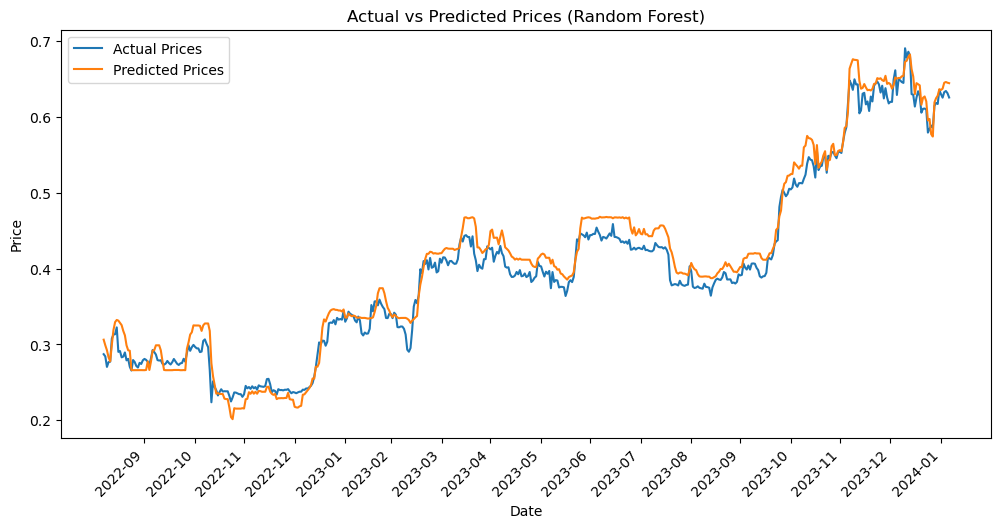

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Actual prices
y_true = df_test['price']

# Predicted prices
y_pred = rf_predictions

# Create a line graph
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_test.index, y_true, label='Actual Prices')
ax.plot(df_test.index, y_pred, label='Predicted Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Actual vs Predicted Prices (Random Forest)')
ax.legend()

# Set x-axis ticks to show year and month
date_format = '%Y-%m'
date_ticks = pd.date_range(start=df_test.index.min(), end=df_test.index.max(), freq='M')
ax.set_xticks(date_ticks)
ax.set_xticklabels([date.strftime(date_format) for date in date_ticks], rotation=45, ha='right')

# Adjust the spacing between x-axis ticks
plt.subplots_adjust(bottom=0.2)

plt.show()

In [25]:
import pandas as pd

# Actual prices
y_true = df_test['price']

# Predicted prices
y_pred = rf_predictions

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({
    'Actual': y_true,
    'Predicted': y_pred
})

# Display the DataFrame
print(result_df)

                             Actual  Predicted
timestamp                                     
2022-09-05 00:00:00+00:00  0.287221   0.306350
2022-09-06 00:00:00+00:00  0.284314   0.298931
2022-09-07 00:00:00+00:00  0.270455   0.292400
2022-09-08 00:00:00+00:00  0.276756   0.283027
2022-09-09 00:00:00+00:00  0.277387   0.277823
...                             ...        ...
2024-02-01 00:00:00+00:00  0.625427   0.637274
2024-02-02 00:00:00+00:00  0.632695   0.645101
2024-02-03 00:00:00+00:00  0.634216   0.646097
2024-02-04 00:00:00+00:00  0.631316   0.645123
2024-02-05 00:00:00+00:00  0.625668   0.644543

[519 rows x 2 columns]


## GRADIENT BOOSTING

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Actual prices
y_true = df_test['price']

# Gradient Boosting predictions
y_pred = gb_preds

# Evaluation metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r_squared = r2_score(y_true, y_pred)

# Print metrics
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R-Squared:', r_squared)

MSE: 0.0003156816045865541
RMSE: 0.017767431006945097
MAE: 0.014814315918409012
R-Squared: 0.9770072189966155


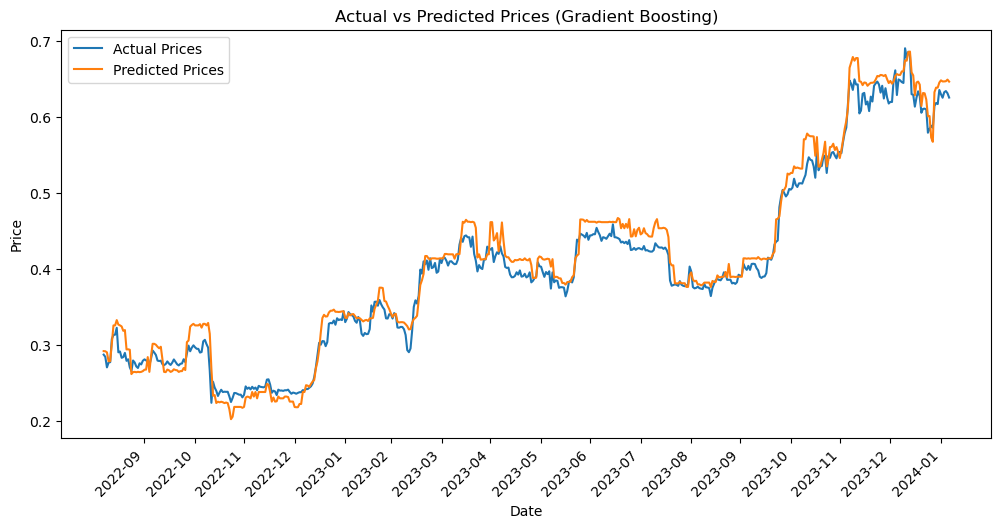

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Actual prices
y_true = df_test['price']

# Gradient Boosting predictions
y_pred = gb_preds

# Create a line graph
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_test.index, y_true, label='Actual Prices')
ax.plot(df_test.index, y_pred, label='Predicted Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Actual vs Predicted Prices (Gradient Boosting)')
ax.legend()

# Set x-axis ticks to show year and month
date_format = '%Y-%m'
date_ticks = pd.date_range(start=df_test.index.min(), end=df_test.index.max(), freq='M')
ax.set_xticks(date_ticks)
ax.set_xticklabels([date.strftime(date_format) for date in date_ticks], rotation=45, ha='right')

# Adjust the spacing between x-axis ticks
plt.subplots_adjust(bottom=0.2)

plt.show()

In [28]:
import pandas as pd

# Actual prices
y_true = df_test['price']

# Gradient Boosting predictions
y_pred = gb_preds

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({
    'Actual': y_true,
    'Predicted': y_pred
})

# Display the DataFrame
print(result_df)

                             Actual  Predicted
timestamp                                     
2022-09-05 00:00:00+00:00  0.287221   0.291886
2022-09-06 00:00:00+00:00  0.284314   0.291693
2022-09-07 00:00:00+00:00  0.270455   0.290264
2022-09-08 00:00:00+00:00  0.276756   0.278610
2022-09-09 00:00:00+00:00  0.277387   0.278610
...                             ...        ...
2024-02-01 00:00:00+00:00  0.625427   0.646863
2024-02-02 00:00:00+00:00  0.632695   0.646910
2024-02-03 00:00:00+00:00  0.634216   0.647168
2024-02-04 00:00:00+00:00  0.631316   0.649303
2024-02-05 00:00:00+00:00  0.625668   0.646644

[519 rows x 2 columns]


## LSTM

In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Actual prices
y_true = y_test

# LSTM predictions
y_pred = y_pred.reshape(-1)  # Flatten the predictions

# Evaluation metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r_squared = r2_score(y_true, y_pred)

# Print metrics
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R-Squared:', r_squared)

MSE: 0.0003156816045865541
RMSE: 0.017767431006945097
MAE: 0.014814315918409012
R-Squared: 0.9770072189966155


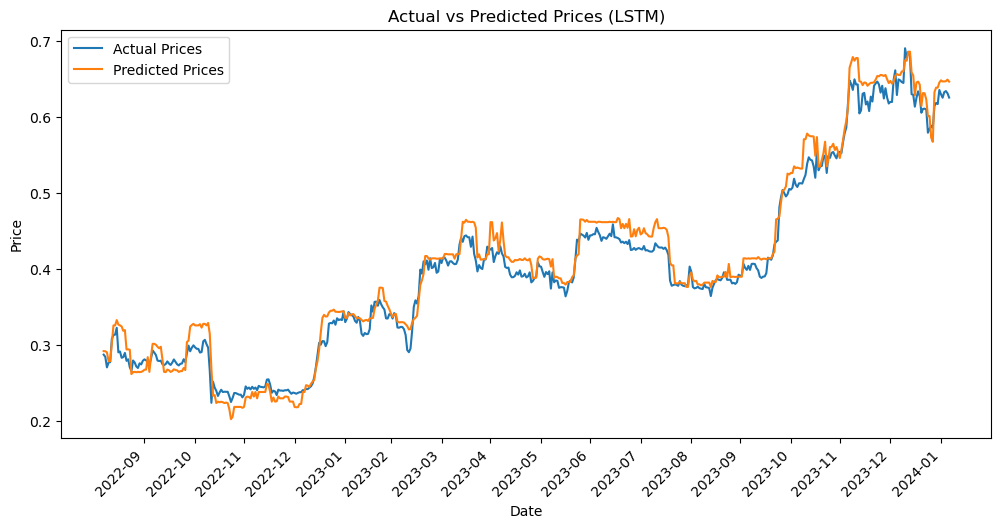

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Actual prices
y_true = y_test

# LSTM predictions
y_pred = y_pred.reshape(-1)

# Create a line graph
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_test.index, y_true, label='Actual Prices')
ax.plot(df_test.index, y_pred, label='Predicted Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Actual vs Predicted Prices (LSTM)')
ax.legend()

# Set x-axis ticks to show year and month
date_format = '%Y-%m'
date_ticks = pd.date_range(start=df_test.index.min(), end=df_test.index.max(), freq='M')
ax.set_xticks(date_ticks)
ax.set_xticklabels([date.strftime(date_format) for date in date_ticks], rotation=45, ha='right')

# Adjust the spacing between x-axis ticks
plt.subplots_adjust(bottom=0.2)

plt.show()

In [31]:
import pandas as pd

# Actual prices
y_true = y_test

# LSTM predictions
y_pred = y_pred.reshape(-1)

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({
    'Actual': y_true,
    'Predicted': y_pred
})

# Display the DataFrame
print(result_df)

       Actual  Predicted
0    0.287221   0.291886
1    0.284314   0.291693
2    0.270455   0.290264
3    0.276756   0.278610
4    0.277387   0.278610
..        ...        ...
514  0.625427   0.646863
515  0.632695   0.646910
516  0.634216   0.647168
517  0.631316   0.649303
518  0.625668   0.646644

[519 rows x 2 columns]


## GRU

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Actual prices
y_true = y_test  

# GRU predictions
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1) 

# Evaluation metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print metrics
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R-Squared:', r2)

17/17 [==============================] - 0s 2ms/step
MSE: 0.0009310327216620265
RMSE: 0.03051282880465242
MAE: 0.028666555859378166
R-Squared: 0.9321879033648581


17/17 [==============================] - 0s 2ms/step


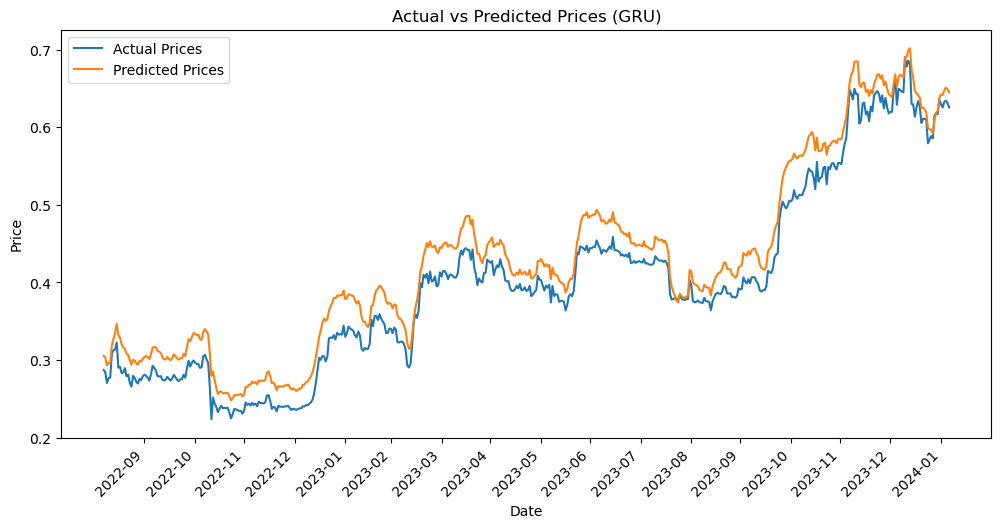

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Actual prices
y_true = y_test  

# GRU predictions
y_pred = model.predict(X_test) 
y_pred = y_pred.reshape(-1)

# Create line graph
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_test.index, y_true, label='Actual Prices')  
ax.plot(df_test.index, y_pred, label='Predicted Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Actual vs Predicted Prices (GRU)') 
ax.legend()

# Format x-axis ticks  
date_format = '%Y-%m'
date_ticks = pd.date_range(start=df_test.index.min(), end=df_test.index.max(), freq='M')
ax.set_xticks(date_ticks)
ax.set_xticklabels([date.strftime(date_format) for date in date_ticks], rotation=45, ha='right')

# Adjust plot  
plt.subplots_adjust(bottom=0.2) 
plt.show()

In [34]:
import pandas as pd

# Actual prices
y_true = y_test

# GRU predictions 
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1)

# Create DataFrame
result_df = pd.DataFrame({
    'Actual': y_true,
    'Predicted': y_pred
})

# Display DataFrame
print(result_df)

17/17 [==============================] - 0s 2ms/step
       Actual  Predicted
0    0.287221   0.305473
1    0.284314   0.303284
2    0.270455   0.293116
3    0.276756   0.296618
4    0.277387   0.295942
..        ...        ...
514  0.625427   0.641525
515  0.632695   0.647491
516  0.634216   0.651029
517  0.631316   0.649138
518  0.625668   0.644903

[519 rows x 2 columns]


## BART 

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Actual values
y_true = y_val

# BART predictions
y_pred = bart_model.predict(X_val) 

# Calculate metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print('MSE:', mse)  
print('RMSE:', rmse)
print('MAE:', mae)
print('R-Squared:', r2)

MSE: 0.0024165409572644114
RMSE: 0.0491583254115151
MAE: 0.027262761481599222
R-Squared: 0.9581621288402652


In [90]:
import pandas as pd

# Actual prices
y_true = y_test 

# BART predicted prices
y_pred = bart_model.predict(X_test)

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({
  'Actual': y_true,
  'Predicted': y_pred
})

# Display the DataFrame 
print(result_df)

        Actual  Predicted
2313  0.417013   0.396007
2089  0.270611   0.263289
761   0.039616   0.057087
829   0.065655   0.077642
1961  0.456887   0.413193
...        ...        ...
49    0.004028   0.025266
1505  0.690635   0.643927
1846  0.597363   0.562956
48    0.004104   0.025005
772   0.042601   0.058587

[519 rows x 2 columns]


## XGBoost

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Actual values
y_true = y_test

# XGBoost predictions
y_pred = xgb.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)  
r2 = r2_score(y_true, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)  
print('MAE:', mae)
print('R-Squared:', r2)

MSE: 7.379319043656978e-05
RMSE: 0.008590296295039525
MAE: 0.004702139293384701
R-Squared: 0.9987224094072686


In [84]:
import pandas as pd

# Actual prices
y_true = y_test

# Predicted prices
y_pred = xgb.predict(X_test)

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({
  'Actual': y_true,
  'Predicted': y_pred  
})

# Display the DataFrame 
print(result_df)

        Actual  Predicted
2313  0.417013   0.408714
2089  0.270611   0.279916
761   0.039616   0.040174
829   0.065655   0.067707
1961  0.456887   0.439794
...        ...        ...
49    0.004028   0.004482
1505  0.690635   0.680158
1846  0.597363   0.589207
48    0.004104   0.004508
772   0.042601   0.042938

[519 rows x 2 columns]
